# **High dimensional data analysis**

There are two datasets containing pictures of cats and dogs. The pictures are stored as text in the CSV files. The files contain a matrix with 4096 rows and 80 columns. Each column is a single pet and each value of the columns shows brightness of a pixel. 

**The goal** of this work is to analyze the datasets using PCA and t-SNE

To load the datasets we use pandas library

In [1]:
import pandas as pd
#load the data
cats = pd.read_csv('https://raw.githubusercontent.com/bioramble/pca/master/cat.csv', delimiter = ',', header = None)
dogs = pd.read_csv('https://raw.githubusercontent.com/bioramble/pca/master/dog.csv', delimiter = ',', header = None)

Let's have a look at the data structure

In [2]:
print('cats shape', cats.shape)
print('dogs shape', dogs.shape)

cats shape (4096, 80)
dogs shape (4096, 80)


There are 80 columns (samples) for each dataset. Each column consists of 4096 values (pixels), which is a 64x64 matrix  stored as one-dimensional lists of pixels. We can reshape each line and show the image of any pet.

To represent each pet as one row of pixels we need to transpose and concatenate cats and dogs to get new dataframe (pets) with 160 rows (corresponding to pets - samples of data) and 4096 values (pixels) in each row. 

Also we create a list of labels (0 - a cat, 1 - a dog) which is necessary in further analysis.

In [3]:
import numpy as np

print('original data shape:\n cats', cats.shape, ', dogs',dogs.shape)
#transpose cats and dogs
cats = cats.T
dogs = dogs.T

#concatenate lists of cats and dogs
pets = pd.concat([cats, dogs], axis = 0, ignore_index=True)

#create labels: 0 - a cat, 1 - a dog
labels = np.concatenate((np.zeros(len(cats)), np.ones(len(dogs))), axis = 0)

print('transformed data shape:\n pets', np.shape(pets))
print('labels',np.shape(labels))


original data shape:
 cats (4096, 80) , dogs (4096, 80)
transformed data shape:
 pets (160, 4096)
labels (160,)


Let's reshape a random sample and show it as an image.

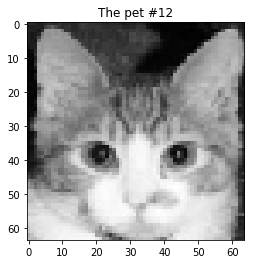

In [4]:
import matplotlib.pyplot as plt

def showPet(indx):#show a pet corresponding to indx
    #get a row corresponding to indx (4096 pixels)
    pet = pets.values[indx]
    fig = plt.figure()
    #reshape an array into a 64x64 pixels picture 
    plt.imshow(pet.reshape(64,64).T, cmap='gray')
    plt.title('The pet #{}'.format(indx))
    plt.show()

showPet(12)

We can look at different pictures and note that there is only the heads filled almost all space at the pictures. The heads are centralized and there is no other parts of their bodies.

To visualize all pets on the one graph, we transform the data into 2 or 3 dimensional space. To do that, we can apply t-SNE or PCA - dimensionality reduction algorithms.

Let's have a look at the data in two dimensional space using sklearn TSNE.

In [5]:
%%time
from sklearn.manifold import TSNE

#get two dimensions: n_components=2
pets_tsne = TSNE(n_components=2).fit_transform(pets)
print('pets_tsne shape', pets_tsne.shape)

pets_tsne shape (160, 2)
Wall time: 3.24 s


As a result, we have an array with 160 rows (corresponding to the number of pets) and 2 columns (t-SNE dimensions) instead of 4096. Now we can represent every pet image as only one point on 2 dimensional space. 
Let's show the points on the scatter plot. Indexes on the picture allow to show the images of pets corresponding to the points.

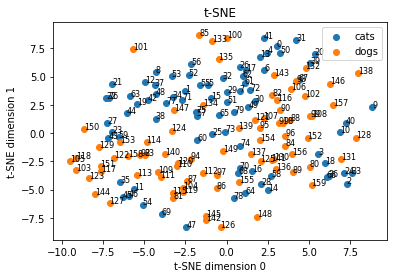

In [6]:
def scatter2d(data, title = '', xlabel = '', ylabel = ''):#plot 2d scatter
    fig, ax = plt.subplots()
    #add all cats (lbl=0) and dogs(lbl)
    for lbl in np.unique(labels):
        i = np.where(labels == lbl)
        ax.scatter(data[i,0], data[i,1], label='cats' if lbl==0 else 'dogs')
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()
    #add indexes to each point
    for i in range(len(labels)):
        ax.annotate(i, (data[i,0], data[i,1]),fontsize=8)
    plt.title(title)
    plt.show()

#show two dimensions calculated by t-SNE
scatter2d(pets_tsne,'t-SNE', 't-SNE dimension 0', 't-SNE dimension 1')


Some parts of the graph contains both types. However, we can see the regions with only orange dots (dogs) and blue dots (cats). 

Investigating the obtained data, we can compare pets located near to each other. The pets #109 and #111 are the good candidates. Let's look at them.

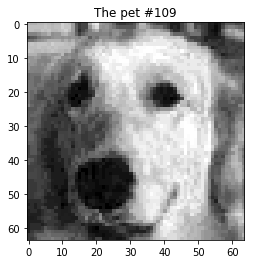

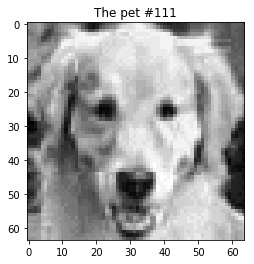

In [7]:
#show a pet corresponding to a dot on the graph
showPet(109)
showPet(111)

We can make a scatter plot interactive and display pictures on mouse click using *%matplotlib* command

In [ ]:
%matplotlib
def interactiveScatter(data, title = '', xlabel = '', ylabel = ''):
    def onpick3(event): #show picked pet
        #get index of the point
        ind = event.ind 
        artist = event.artist
        #is it a dog?
        if scatters.index(artist) == 1:
            ind+=len(cats) #add offset equal to number of cats (pets[0:80] - cats, pets[80:160] - dogs)
        showPet(ind)

    fig, ax = plt.subplots()
    
    scatters = []
    #add all cats (lbl=0) and dogs(lbl)
    for lbl in np.unique(labels):
        i = np.where(labels == lbl)
        scatters.append(ax.scatter(data[i,0], data[i,1], label='cats' if lbl==0 else 'dogs',picker=True))     
    #add indexes to each point
    for i in range(len(labels)):
        ax.annotate(i, (data[i,0], data[i,1]),fontsize=7)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()    
    plt.title(title)
    plt.show()
    #call event handling function onpick3
    fig.canvas.mpl_connect('pick_event', onpick3)
    plt.show()
    
interactiveScatter(pets_tsne,'t-SNE', 't-SNE dimension 0', 't-SNE dimension 1')

Now it is much easier to see the pictures. 

If we look on different pets corresponding to indexes, we can notice that the neighbor pictures have some similar traits or color similarities and difference from remote points.

Let's add one more dimension.

In [8]:
%%time
pets_tsne = TSNE(n_components=3).fit_transform(pets)
print('ok', pets_tsne.shape )  

ok (160, 3)
Wall time: 3.53 s


Import Axes3D from mpl_toolkits.mplot3d to plot 3D scatter. You can use *%matplotlib* or *%matplotlib notebook* to look at the resulting data from different angles. 

<IPython.core.display.Javascript object>


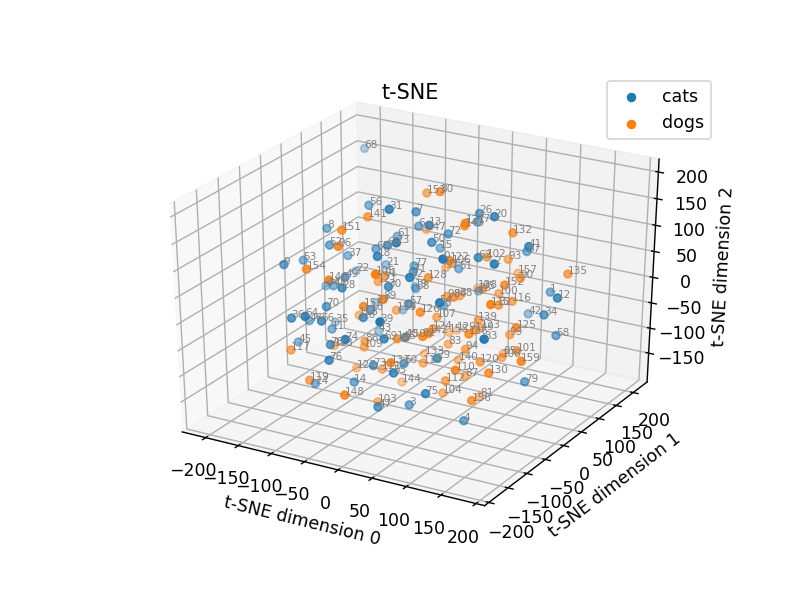

In [9]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D 

def scatter3d(data, title = '', xlabel = '', ylabel = '', zlabel = ''):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    group = np.array(labels)
    #add all cats (lbl=0) and dogs(lbl)
    for lbl in np.unique(labels):
        i = np.where(labels == lbl)
        ax.scatter(data[i,0], data[i,1], data[i,2], label='cats' if lbl==0 else 'dogs')
    #add indexes
    for i in range(len(labels)):    
        ax.text(data[i,0], data[i,1], data[i,2], i, fontsize=6, color ='gray')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel(zlabel)
    ax.legend()
    plt.title(title)
    plt.show()
    
scatter3d(pets_tsne, 't-SNE', 't-SNE dimension 0', 't-SNE dimension 1', 't-SNE dimension 2')

There is a mess of points. In this case, the third dimention is redundant and makes difficult to separate the clusters visually. 

We can look on results of PCA and plot principal components.

In [10]:
%%time
#pca
from sklearn.decomposition import PCA
pca_comp = 160
pca = PCA(n_components=pca_comp)
pets_pca = pca.fit_transform(pets)

print('pets_pca shape', pets_pca.shape)  

pets_pca shape (160, 160)
Wall time: 56.8 ms


The result is a matrix with 160 rows (corresponding to the number of pets) and 160 columns (corresponding to the number of principal components). We can set up to min(n_samples, n_features) components for the sklearn PCA. 

The principal components are ordered by decreasing variance explaining the data. We can estimate how many components explain certain percent of data by looking at the curve of the cumulative sum of explained variance.
Calculate cumulative sum of pca.explained_variance_ratio_ to plot the curve

<IPython.core.display.Javascript object>


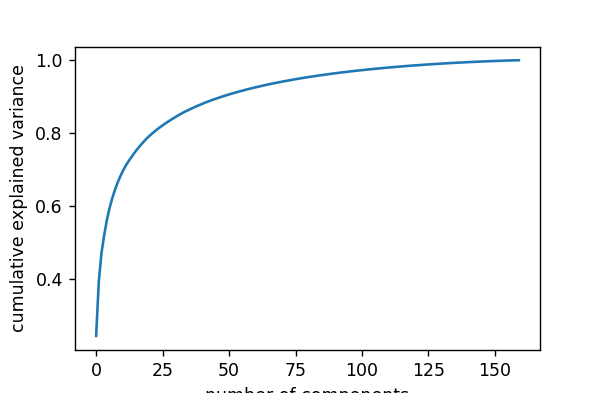

In [11]:
fig = plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

As it is shown, the line grow rapidly at the beginning and slowly rise at the end. It is because the first components has highest explained variance, which decreases when moving to the following components. 
About 60 components include 90 percent of variance and if we plot only 2 or 3 components, we lose a lot of information (according to explained variance). However, in practice, only several components can be enough to determine patterns in the original data.

We can plot the first and the second components, which has the largest possible variance.


<IPython.core.display.Javascript object>


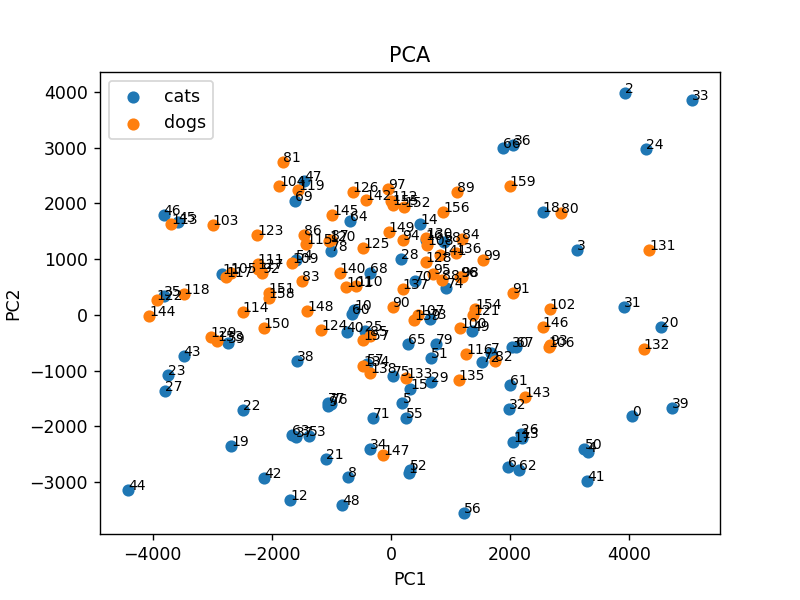

In [12]:
#choose indexes of  two components to plot
pc1, pc2 = 0,1
pca_data = np.stack((pets_pca[:,pc1], pets_pca[:,pc2]), axis =-1)
#plot 2 principal components
scatter2d(pca_data, 'PCA', 'PC' + str(pc1+1), 'PC' + str(pc2+1))


PCA gives nice results. We can see regions where most cats and dogs are located.
Let's look at three components:

<IPython.core.display.Javascript object>


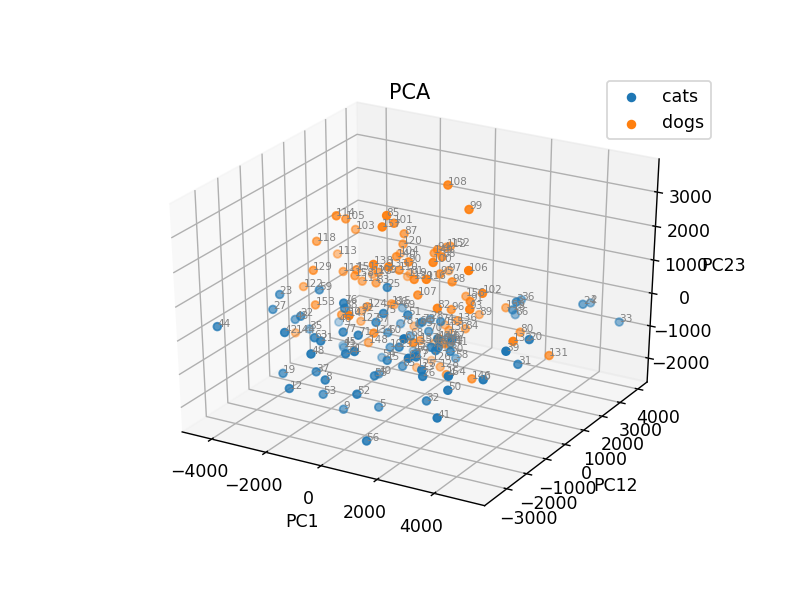

In [13]:
#choose indexes of three components to plot
pc1, pc2, pc3 = 0,1,2

pca_data = np.stack((pets_pca[:,pc1], pets_pca[:,pc2], pets_pca[:,pc3]), axis =-1)
scatter3d(pca_data, 'PCA', 'PC' + str(pc1+1), 'PC1' + str(pc2+1), 'PC2' + str(pc3+1))

The 3D scatter shows that we can distinguish blue data points from orange ones. Although we still have dogs among cats and cats among dogs, the result seems good.
Let's plot other principal components.

<IPython.core.display.Javascript object>


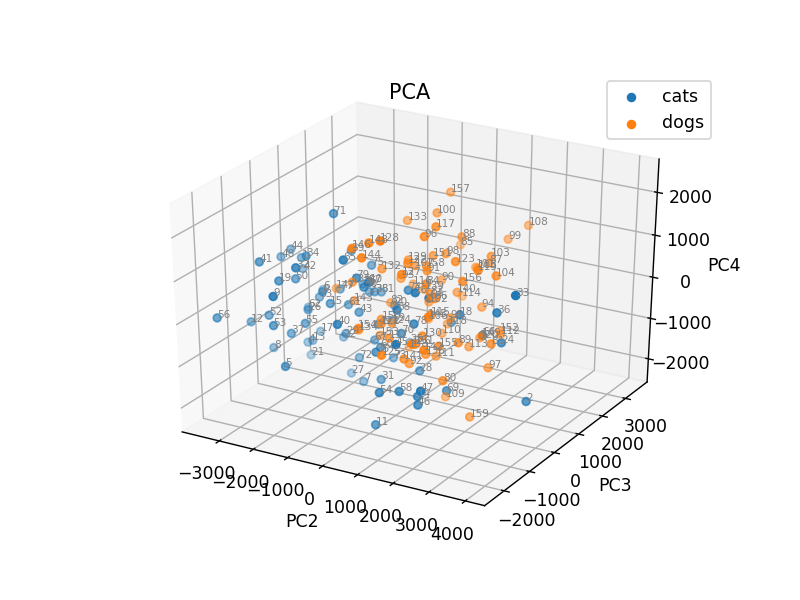

In [14]:
#choose indexes of three components to plot
pc1, pc2, pc3 = 1,2,3

pca_data = np.stack((pets_pca[:,pc1], pets_pca[:,pc2], pets_pca[:,pc3]), axis =-1)
scatter3d(pca_data, 'PCA', 'PC' + str(pc1+1), 'PC' + str(pc2+1), 'PC' + str(pc3+1))

We can use different combinations of principal components (ex: [0,1,3], [1,4,5], etc), but 1st, 2nd and 3rd components help to divide the samples in the best way.

What if we visualize 10 or 30 or more components in two or three dimentional space? Let's use TSNE.

<IPython.core.display.Javascript object>


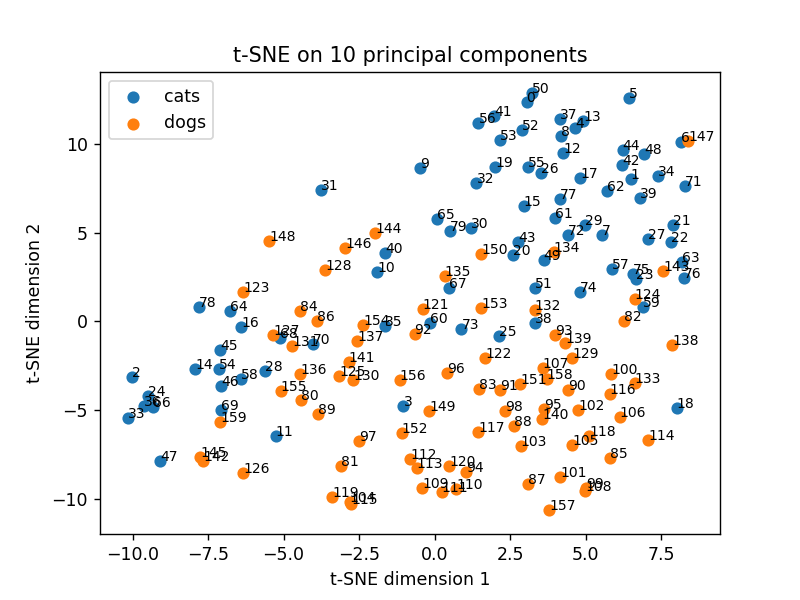

Wall time: 2.74 s


In [15]:
%%time
n_comp = 10
pets_tsne = TSNE(n_components=2).fit_transform(pets_pca[:,1:n_comp])
scatter2d(pets_tsne, 't-SNE on ' + str(n_comp) + ' principal components', 't-SNE dimension 1', 't-SNE dimension 2')

<IPython.core.display.Javascript object>


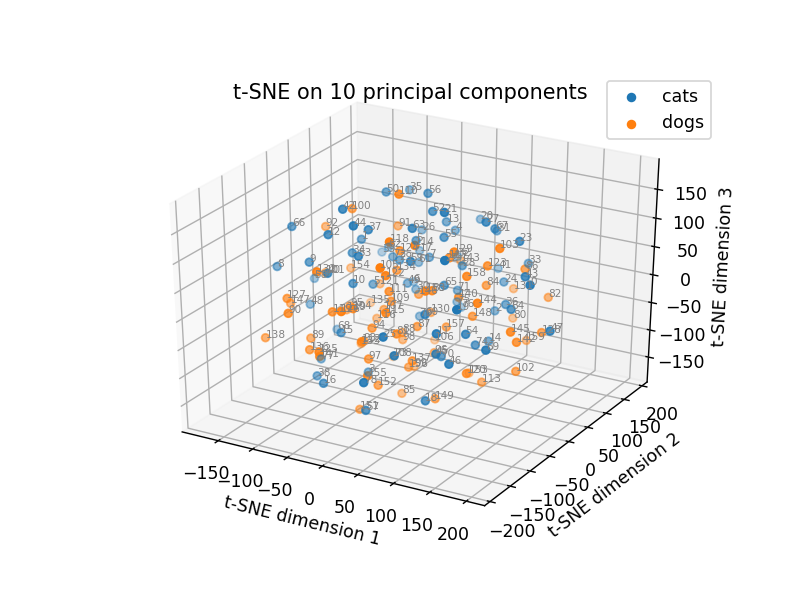

Wall time: 3.46 s


In [16]:
%%time
pets_tsne = TSNE(n_components=3).fit_transform(pets_pca[:,:n_comp])
scatter3d(pets_tsne, 't-SNE on ' + str(n_comp) + ' principal components', 't-SNE dimension 1', 't-SNE dimension 2', 't-SNE dimension 3')

**Conclusion**


Data visualization allows to have a better understanding of internal structure of the data. 
We can apply dimensionality reduction algorithms to visualize data. Furthermore, we can use reduced data in machine learning tasks, such as clustering. Often it can reduce the training time. 

In this work, we applied t-SNE and PCA algorithms included in sklearn library.

t-SNE transforms initial data to a lower dimensional space. This is a great tool to get a first look at the data, but it is difficult to use this algorithm to add new data to the result. Another disadvantage is repeatability. It can provide different outputs for the same data on multiple runs. 

PCA does not change the original data, but represents data in another form. It showed surprisingly nice results - PCA is much faster than t-SNE and gives visual groups of samples. It is possible to select important components. We can use more than three principal components and visualize them using t-SNE. 

The result of t-SNE on PCA data showed almost the same as t-SNE on original data, but took less time. It means we did not lose a lot of useful information doing principal component analysis and we can use reduced data in analysis tasks to get good results in less time.


